# 📊 Capstone Project Notebook Template

> **Fill in each placeholder (🔲) with your project‑specific content.**
> Make sure the notebook runs top‑to‑bottom before submission.

## 1 — Project Overview  
- **Theme**: Student retention 
- **Core Question**: Who is at risk of dropping out School?
- **Stakeholder / End‑User**: Goverment of Portugal, especially Ministry of Education, and secondary aged student's parents
- **Success Metric**: 🔲 *e.g. MAE < \$20 000 or Recall > 90 %*

## 2 — Dataset Details  
- **Source**: https://archive.ics.uci.edu/dataset/320/student+performance  
- **Licence / Attribution**:  Creative Commons Attribution 4.0 International (CC BY 4.0) license  
- **Unit of Analysis**: columns: 30 & rows: 649 
- **Target Variable**: Final period grade (G3)  
- **Features of Interest**:   
- **Anticipated Challenges**: converting string values attributes into compilable data (i.e. Int64 or float64)

In [1]:
import pandas as pd
import numpy as np


In [26]:
import seaborn as sns

In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score,r2_score, mean_squared_error, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
import matplotlib

%pylab inline

%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
raw1 = pd.read_csv(
    'C:\\Users\\Kresna\\Personal-Learn\\00_AI_Tech_course\\ab-25-06-beginner-ai-QRS\\week03_eda_stats\\notebooks\\student_por.csv', sep=";"
)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
raw1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [7]:
raw_temp = raw1.copy()

In [8]:
cols_to_convert = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

binary_map = {"no": 0, "yes": 1}

for col in cols_to_convert:
    if col in raw1.columns: # Check if the column exists in the DataFrame
        print(f"\nProcessing column: '{col}'")

        # 1. Standardize the string values in the column (strip whitespace, convert to lowercase)
        # This makes the mapping more robust to ' Yes', 'NO ', 'yes', etc.
        raw1[col] = raw1[col].astype(str).str.strip().str.lower()
        
        # 2. Perform the replacement using the defined binary_mappingb
        # Any values not in 'binary_mapping' (e.g., 'unknown', NaN) will remain as they are
        # UNLESS you explicitly include them in the mapping.
        raw1[col] = raw1[col].replace(binary_map)
        # print (raw1[col])

        # 3. Convert the column to an integer type
        # Use a try-except block to handle cases where there might still be non-numeric values
        # (e.g., original NaNs, or values not in your mapping like 'unknown' which would remain as strings).
        try:
            # Try to convert to the nullable integer type first, which can hold NaNs
            raw1[col] = raw1[col].astype('Int64') # Note the capital 'I' for nullable integer
            print(f"  Successfully converted '{col}' to 'Int64' (nullable integer).")
        except ValueError:
            # If 'Int64' fails (e.g., if there are still non-numeric strings that 'replace' missed),
            # convert to float, which can handle non-integer numbers and NaNs.
            print(f"  Warning: '{col}' contains values that could not be converted to integer. Converting to float.")
            raw1[col] = raw1[col].astype(float)
        except Exception as e:
            print(f"  An unexpected error occurred while converting '{col}': {e}. Column type not changed.")

        # Optional: Display value counts and data type after conversion for verification
        print(raw1[col].value_counts(dropna=False)) # dropna=False shows NaN counts too
        print(f"  Final Dtype: {raw1[col].dtype}")

    else:
        print(f"\nSkipping column '{col}': Not found in the DataFrame.")

print("\n--- Bulk conversion complete ---")
print("First few rows of raw1 with converted columns:")
print(raw1[cols_to_convert].head()) # Show only the converted columns for a quick check
print("\nData types of converted columns:")
print(raw1[cols_to_convert].info())


Processing column: 'schoolsup'
  Successfully converted 'schoolsup' to 'Int64' (nullable integer).
schoolsup
0    581
1     68
Name: count, dtype: Int64
  Final Dtype: Int64

Processing column: 'famsup'
  Successfully converted 'famsup' to 'Int64' (nullable integer).
famsup
1    398
0    251
Name: count, dtype: Int64
  Final Dtype: Int64

Processing column: 'paid'
  Successfully converted 'paid' to 'Int64' (nullable integer).
paid
0    610
1     39
Name: count, dtype: Int64
  Final Dtype: Int64

Processing column: 'activities'
  Successfully converted 'activities' to 'Int64' (nullable integer).
activities
0    334
1    315
Name: count, dtype: Int64
  Final Dtype: Int64

Processing column: 'nursery'
  Successfully converted 'nursery' to 'Int64' (nullable integer).
nursery
1    521
0    128
Name: count, dtype: Int64
  Final Dtype: Int64

Processing column: 'higher'
  Successfully converted 'higher' to 'Int64' (nullable integer).
higher
1    580
0     69
Name: count, dtype: Int64
  Final

C:\Users\Kresna\AppData\Local\Temp\ipykernel_29184\1967074349.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw1[col] = raw1[col].replace(binary_map)
C:\Users\Kresna\AppData\Local\Temp\ipykernel_29184\1967074349.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw1[col] = raw1[col].replace(binary_map)
C:\Users\Kresna\AppData\Local\Temp\ipykernel_29184\1967074349.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [ ]:
raw_temp.head(10)

In [9]:
if "sex" in raw1.columns: # Check if the column exists in the DataFrame
    print("--- Converting 'sex' column (F=0, M=1) ---")
    sex_mapping = {
        "F": 0, "M": 1, 
        "f": 0, "m": 1
    }

    raw1['sex'] = raw1['sex'].astype(str).str.strip().str.title()
    raw1['sex'] = raw1['sex'].map(sex_mapping)
    try:
        raw1['sex'] = raw1['sex'].astype('Int64')
        print("  Successfully converted 'sex' to 'Int64' (nullable integer).")
    except Exception as e:
        print(f"  Warning: Could not convert 'sex' to 'Int64'. Error: {e}. Converting to float.")
        raw1['sex'] = raw1['sex'].astype(float)
    
    print("\nValue counts for 'sex' column after conversion (including NaN if any):")
    print(raw1['sex'].value_counts(dropna=False))

    print(f"\nData type of 'sex' column: {raw1['sex'].dtype}")
    print("\nFirst 10 rows of 'sex' column:")
    print(raw1['sex'].head(11))

else:
    print("Column 'sex' not found in the DataFrame. No conversion performed.")


--- Converting 'sex' column (F=0, M=1) ---
  Successfully converted 'sex' to 'Int64' (nullable integer).

Value counts for 'sex' column after conversion (including NaN if any):
sex
0    383
1    266
Name: count, dtype: Int64

Data type of 'sex' column: Int64

First 10 rows of 'sex' column:
0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     1
10    0
Name: sex, dtype: Int64


In [ ]:
raw1.head(11)

In [10]:
if "famsize" in raw1.columns:
    print("--- Starting 'famsize' column specific diagnosis ---")

    # --- Step 1: Standardize the column and inspect its unique values ---
    # Convert to string, strip whitespace, and convert to lowercase
    # We're assigning this to a temporary name 'famsize_for_mapping' to inspect its exact state
    famsize_for_mapping = raw1['famsize'].astype(str).str.strip().str.lower()

    print("\n--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---")
    # >>>>>> THIS IS THE OUTPUT WE NEED TO SEE <<<<<<
    # It should show ['le3', 'gt3'] and possibly 'nan' if there are missing values
    print(famsize_for_mapping.unique())
    print(famsize_for_mapping.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point A: {famsize_for_mapping.dtype}")

    # --- Step 2: Define your mapping dictionary ---
    # Make sure the keys here EXACTLY match what you saw in the output from Diagnostic Point A
    fam_mapping = {
        "le3": 0,
        "gt3": 1
        # IMPORTANT: If you see anything else in Diagnostic Point A's unique list,
        # you MUST add it here and decide how to map it (e.g., 'nan': np.nan, 'other_value': -1)
    }
    print(f"\nDefined mapping dictionary: {fam_mapping}")

    # --- Step 3: Apply the map and inspect the result ---
    # Applying map to the correctly standardized Series
    famsize_mapped = famsize_for_mapping.map(fam_mapping)

    print("\n--- Diagnostic Point B: Unique values and counts AFTER .map() ---")
    print(famsize_mapped.unique()) # This should now show [0, 1, nan] or just [0, 1]
    print(famsize_mapped.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point B: {famsize_mapped.dtype}") # This should be float64 if any NaN, or int64 if no NaN
    print(famsize_mapped.head(11))

    # --- Step 4: Final type conversion and assignment (only if Diagnostic Point B looks correct) ---
    if famsize_mapped.dtype == 'float64' and famsize_mapped.isnull().all():
        print("\nWARNING: All values are NaN after mapping. This means the mapping keys DO NOT match the processed strings.")
        print("Please review 'Diagnostic Point A' output carefully and adjust 'fam_mapping' accordingly.")
    else:
        try:
            raw1['famsize'] = famsize_mapped.astype('Int64') # Assign the successful conversion back to the original column name
            print("\n  Successfully converted 'famsize' to 'Int64' (nullable integer).")
            print(f"Final 'famsize' column dtype: {raw1['famsize'].dtype}")
            print(raw_temp['famsize'].value_counts(dropna=False))
        except Exception as e:
            print(f"\n  Error during final astype('Int64'): {e}. Column type remains as is (likely float).")

else:
    print("Column 'famsize' not found in the DataFrame. Cannot proceed with diagnosis.")

--- Starting 'famsize' column specific diagnosis ---

--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---
['gt3' 'le3']
famsize
gt3    457
le3    192
Name: count, dtype: int64
Dtype at Diagnostic Point A: object

Defined mapping dictionary: {'le3': 0, 'gt3': 1}

--- Diagnostic Point B: Unique values and counts AFTER .map() ---
[1 0]
famsize
1    457
0    192
Name: count, dtype: int64
Dtype at Diagnostic Point B: int64
0     1
1     1
2     0
3     1
4     1
5     0
6     0
7     1
8     0
9     1
10    1
Name: famsize, dtype: int64

  Successfully converted 'famsize' to 'Int64' (nullable integer).
Final 'famsize' column dtype: Int64
famsize
GT3    457
LE3    192
Name: count, dtype: int64


In [ ]:
raw1.head(11)

In [11]:
if "guardian" in raw1.columns:
    print("--- Starting 'guardian' column specific diagnosis ---")

    guardian_for_mapping = raw1['guardian'].astype(str).str.strip().str.lower()
    print("\n--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---")

    print(guardian_for_mapping.unique())
    print(guardian_for_mapping.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point A: {guardian_for_mapping.dtype}")

    guardian_mapping = {
        "mother": 0,
        "father": 1
        # IMPORTANT: If you see anything else in Diagnostic Point A's unique list,
        # you MUST add it here and decide how to map it (e.g., 'nan': np.nan, 'other_value': -1)
    }
    print(f"\nDefined mapping dictionary: {guardian_mapping}")

   
    guardian_mapped = guardian_for_mapping.map(guardian_mapping)

    print("\n--- Diagnostic Point B: Unique values and counts AFTER .map() ---")
    print(guardian_mapped.unique()) # This should now show [0, 1, nan] or just [0, 1]
    print(guardian_mapped.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point B: {guardian_mapped.dtype}") # This should be float64 if any NaN, or int64 if no NaN
    print(guardian_mapped.head(11))

    
    if guardian_mapped.dtype == 'float64' and guardian_mapped.isnull().all():
        print("\nWARNING: All values are NaN after mapping. This means the mapping keys DO NOT match the processed strings.")
        print("Please review 'Diagnostic Point A' output carefully and adjust 'guardian_mapping' accordingly.")
    else:
        try:
            raw1['guardian'] = guardian_mapped.astype('Int64') # Assign the successful conversion back to the original column name
            print("\n  Successfully converted 'guardian' to 'Int64' (nullable integer).")
            print(f"Final 'guardian' column dtype: {raw1['guardian'].dtype}")
            print(raw1['guardian'].value_counts(dropna=False))
        except Exception as e:
            print(f"\n  Error during final astype('Int64'): {e}. Column type remains as is (likely float).")

else:
    print("Column 'guardian' not found in the DataFrame. Cannot proceed with diagnosis.")

--- Starting 'guardian' column specific diagnosis ---

--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---
['mother' 'father' 'other']
guardian
mother    455
father    153
other      41
Name: count, dtype: int64
Dtype at Diagnostic Point A: object

Defined mapping dictionary: {'mother': 0, 'father': 1}

--- Diagnostic Point B: Unique values and counts AFTER .map() ---
[ 0.  1. nan]
guardian
0.0    455
1.0    153
NaN     41
Name: count, dtype: int64
Dtype at Diagnostic Point B: float64
0     0.0
1     1.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: guardian, dtype: float64

  Successfully converted 'guardian' to 'Int64' (nullable integer).
Final 'guardian' column dtype: Int64
guardian
0       455
1       153
<NA>     41
Name: count, dtype: Int64


In [12]:
if "Pstatus" in raw1.columns:
    print("--- Starting 'Pstatus' column specific diagnosis ---")

    Pstatus_for_mapping = raw1['Pstatus'].astype(str).str.strip().str.title()
    print("\n--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---")

    print(Pstatus_for_mapping.unique())
    print(Pstatus_for_mapping.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point A: {Pstatus_for_mapping.dtype}")

    Pstatus_mapping = {
        "A": 0,
        "T": 1
        # IMPORTANT: If you see anything else in Diagnostic Point A's unique list,
        # you MUST add it here and decide how to map it (e.g., 'nan': np.nan, 'other_value': -1)
    }
    print(f"\nDefined mapping dictionary: {Pstatus_mapping}")

   
    Pstatus_mapped = Pstatus_for_mapping.map(Pstatus_mapping)

    print("\n--- Diagnostic Point B: Unique values and counts AFTER .map() ---")
    print(Pstatus_mapped.unique()) # This should now show [0, 1, nan] or just [0, 1]
    print(Pstatus_mapped.value_counts(dropna=False))
    print(f"Dtype at Diagnostic Point B: {Pstatus_mapped.dtype}") # This should be float64 if any NaN, or int64 if no NaN
    print(Pstatus_mapped.head(11))

    
    if Pstatus_mapped.dtype == 'float64' and Pstatus_mapped.isnull().all():
        print("\nWARNING: All values are NaN after mapping. This means the mapping keys DO NOT match the processed strings.")
        print("Please review 'Diagnostic Point A' output carefully and adjust 'Pstatus_mapping' accordingly.")
    else:
        try:
            raw1['Pstatus'] = Pstatus_mapped.astype('Int64') # Assign the successful conversion back to the original column name
            print("\n  Successfully converted 'Pstatus' to 'Int64' (nullable integer).")
            print(f"Final 'Pstatus' column dtype: {raw1['Pstatus'].dtype}")
            print(raw1['Pstatus'].value_counts(dropna=False))
        except Exception as e:
            print(f"\n  Error during final astype('Int64'): {e}. Column type remains as is (likely float).")

else:
    print("Column 'Pstatus' not found in the DataFrame. Cannot proceed with diagnosis.")

--- Starting 'Pstatus' column specific diagnosis ---

--- Diagnostic Point A: Unique values AFTER .astype(str).str.strip().str.lower() ---
['A' 'T']
Pstatus
T    569
A     80
Name: count, dtype: int64
Dtype at Diagnostic Point A: object

Defined mapping dictionary: {'A': 0, 'T': 1}

--- Diagnostic Point B: Unique values and counts AFTER .map() ---
[0 1]
Pstatus
1    569
0     80
Name: count, dtype: int64
Dtype at Diagnostic Point B: int64
0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
Name: Pstatus, dtype: int64

  Successfully converted 'Pstatus' to 'Int64' (nullable integer).
Final 'Pstatus' column dtype: Int64
Pstatus
1    569
0     80
Name: count, dtype: Int64


In [13]:
raw1.head(11)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,U,1,0,4,4,at_home,teacher,course,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,0,17,U,1,1,1,1,at_home,other,course,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,0,15,U,0,1,1,1,at_home,other,other,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,0,15,U,1,1,4,2,health,services,home,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,0,16,U,1,1,3,3,other,other,home,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13
5,GP,1,16,U,0,1,4,3,services,other,reputation,0,1,2,0,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,12,12,13
6,GP,1,16,U,0,1,2,2,other,other,home,0,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,13,12,13
7,GP,0,17,U,1,0,4,4,other,teacher,home,0,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,10,13,13
8,GP,1,15,U,0,0,3,2,services,other,home,0,1,2,0,0,1,0,0,1,1,1,0,4,2,2,1,1,1,0,15,16,17
9,GP,1,15,U,1,1,3,4,other,other,home,0,1,2,0,0,1,0,1,1,1,1,0,5,5,1,1,1,5,0,12,12,13


In [14]:
columns_to_inspect = ['Mjob', 'Fjob', 'reason']

print("--- Value Counts for Multiple Categorical Columns ---")

for col in columns_to_inspect:
    if col in raw1.columns: # Good practice to check if column exists
        print(f"\nValue Counts for '{col}':")
        # Apply .value_counts() to the individual column (Series)
        print(raw1[col].value_counts(dropna=False)) # dropna=False to include any NaNs if present
    else:
        print(f"\nWarning: Column '{col}' not found in the DataFrame.")

--- Value Counts for Multiple Categorical Columns ---

Value Counts for 'Mjob':
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

Value Counts for 'Fjob':
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

Value Counts for 'reason':
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64


In [15]:
raw1_temp = raw1.copy()

In [16]:
columns_to_onehot_encode = ['Mjob', 'Fjob', 'reason']

print("--- Before One-Hot Encoding ---")
print("Original raw1 head (relevant columns):")
print(raw1[columns_to_onehot_encode].head())
print("\nOriginal raw1 info:")
raw1.info()

# Perform One-Hot Encoding
# This will create new numerical (0/1) columns and drop the original string columns
# The 'dtype=int' ensures the new columns are integers (0 or 1)
# The 'drop_first=True' helps avoid multicollinearity by removing one redundant dummy variable per original column
raw1 = pd.get_dummies(raw1, columns=columns_to_onehot_encode, drop_first=False, dtype=int)

print("\n--- After One-Hot Encoding ---")
print("raw1 head after encoding (showing new columns - scroll right to see them):")
print(raw1.head())

print("\nraw1 info after encoding:")
raw1.info()

--- Before One-Hot Encoding ---
Original raw1 head (relevant columns):
      Mjob      Fjob  reason
0  at_home   teacher  course
1  at_home     other  course
2  at_home     other   other
3   health  services    home
4    other     other    home

Original raw1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    Int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    Int64 
 5   Pstatus     649 non-null    Int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    608 non-null    Int64 
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null

In [ ]:
print("\nNew columns created for Mjob:")
print([col for col in raw1.columns if col.startswith('Mjob_')])
print("\nNew columns created for Fjob:")
print([col for col in raw1.columns if col.startswith('Fjob_')])
print("\nNew columns created for reason:")
print([col for col in raw1.columns if col.startswith('reason_')])

In [17]:
raw1.head(11)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,GP,0,18,U,1,0,4,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,GP,0,17,U,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,GP,0,15,U,0,1,1,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,GP,0,15,U,1,1,4,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,GP,0,16,U,1,1,3,3,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,GP,1,16,U,0,1,4,3,0,1,2,0,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,12,12,13,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,GP,1,16,U,0,1,2,2,0,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,13,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,GP,0,17,U,1,0,4,4,0,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,10,13,13,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8,GP,1,15,U,0,0,3,2,0,1,2,0,0,1,0,0,1,1,1,0,4,2,2,1,1,1,0,15,16,17,0,0,0,1,0,0,0,1,0,0,0,1,0,0
9,GP,1,15,U,1,1,3,4,0,1,2,0,0,1,0,1,1,1,1,0,5,5,1,1,1,5,0,12,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [18]:
raw_temp.head(11)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [20]:
cols_to_drop = ["school", "address"]

df_clean = raw1.drop(columns=cols_to_drop, errors="ignore")

In [21]:
df_clean.head(11)

,sex,age,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0,18,1,0,4,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,15,0,1,1,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,15,1,1,4,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0,16,1,1,3,3,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,1,16,0,1,4,3,0,1,2,0,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,12,12,13,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,1,16,0,1,2,2,0,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,13,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,0,17,1,0,4,4,0,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,10,13,13,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8,1,15,0,0,3,2,0,1,2,0,0,1,0,0,1,1,1,0,4,2,2,1,1,1,0,15,16,17,0,0,0,1,0,0,0,1,0,0,0,1,0,0
9,1,15,1,1,3,4,0,1,2,0,0,1,0,1,1,1,1,0,5,5,1,1,1,5,0,12,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [32]:
df_before_drop = df_clean.copy()

print("Shape before dropping rows:", df_before_drop.shape)
print("Non-null counts before dropping rows (showing guardian has <NA>):")
print(df_before_drop.info()) # This will confirm guardian has 608 non-nulls

# Drop rows with any <NA> values
df_no_na = df_before_drop.dropna()

print("\nShape after dropping rows with any <NA>:", df_no_na.shape)
print("Non-null counts after dropping rows:")
print(df_no_na.info()) 

Shape before dropping rows: (649, 42)
Non-null counts before dropping rows (showing guardian has <NA>):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    Int64
 1   age                649 non-null    int64
 2   famsize            649 non-null    Int64
 3   Pstatus            649 non-null    Int64
 4   Medu               649 non-null    int64
 5   Fedu               649 non-null    int64
 6   guardian           608 non-null    Int64
 7   traveltime         649 non-null    int64
 8   studytime          649 non-null    int64
 9   failures           649 non-null    int64
 10  schoolsup          649 non-null    Int64
 11  famsup             649 non-null    Int64
 12  paid               649 non-null    Int64
 13  activities         649 non-null    Int64
 14  nursery            649 non-null    Int64
 15  high

In [37]:
df1_clean = df_no_na.copy()

print("--- df1_clean.info() BEFORE Heatmap Attempt ---")
df1_clean.info() # <<< Crucial diagnostic step
print("-" * 40)

--- df1_clean.info() BEFORE Heatmap Attempt ---
<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                608 non-null    Int64
 1   age                608 non-null    int64
 2   famsize            608 non-null    Int64
 3   Pstatus            608 non-null    Int64
 4   Medu               608 non-null    int64
 5   Fedu               608 non-null    int64
 6   guardian           608 non-null    Int64
 7   traveltime         608 non-null    int64
 8   studytime          608 non-null    int64
 9   failures           608 non-null    int64
 10  schoolsup          608 non-null    Int64
 11  famsup             608 non-null    Int64
 12  paid               608 non-null    Int64
 13  activities         608 non-null    Int64
 14  nursery            608 non-null    Int64
 15  higher             608 non-null    Int64
 16  internet           

In [79]:
df_cln = df_clean.drop(columns='guardian', errors='ignore')

print("--- df_cln.info() BEFORE Heatmap Attempt ---")
df_cln.info() # <<< Crucial diagnostic step
print("-" * 40)

--- df_cln.info() BEFORE Heatmap Attempt ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    Int64
 1   age                649 non-null    int64
 2   famsize            649 non-null    Int64
 3   Pstatus            649 non-null    Int64
 4   Medu               649 non-null    int64
 5   Fedu               649 non-null    int64
 6   traveltime         649 non-null    int64
 7   studytime          649 non-null    int64
 8   failures           649 non-null    int64
 9   schoolsup          649 non-null    Int64
 10  famsup             649 non-null    Int64
 11  paid               649 non-null    Int64
 12  activities         649 non-null    Int64
 13  nursery            649 non-null    Int64
 14  higher             649 non-null    Int64
 15  internet           649 non-null    Int64
 16  romantic         

In [80]:
df_cln.describe().round(2)

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
count,649.0,649.00,649.0,649.0,649.00,649.00,649.00,649.00,649.00,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.41,16.74,0.7,0.88,2.51,2.31,1.57,1.93,0.22,0.1,0.61,0.06,0.49,0.8,0.89,0.77,0.37,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91,0.21,0.07,0.40,0.21,0.11,0.06,0.04,0.57,0.28,0.06,0.44,0.23,0.11,0.22
std,0.49,1.22,0.46,0.33,1.13,1.10,0.75,0.83,0.59,0.31,0.49,0.24,0.5,0.4,0.31,0.42,0.48,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23,0.41,0.26,0.49,0.41,0.31,0.25,0.19,0.50,0.45,0.23,0.50,0.42,0.31,0.41
min,0.0,15.00,0.0,0.0,0.00,0.00,1.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,16.00,0.0,1.0,2.00,1.00,1.00,1.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.0,17.00,1.0,1.0,2.00,2.00,1.00,2.00,0.00,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.0,18.00,1.0,1.0,4.00,3.00,2.00,2.00,0.00,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
max,1.0,22.00,1.0,1.0,4.00,4.00,4.00,4.00,3.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [81]:
df_cln.corr().round(2)

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
sex,1.00,-0.04,-0.10,0.06,0.12,0.08,0.04,-0.21,0.07,-0.11,-0.13,0.08,0.12,-0.04,-0.06,0.07,-0.11,0.08,0.15,0.06,0.28,0.32,0.14,0.02,-0.10,-0.10,-0.13,-0.13,0.04,-0.02,0.06,0.10,-0.05,-0.01,-0.03,0.05,0.04,-0.05,0.06,0.03,-0.03
age,-0.04,1.00,0.00,-0.01,-0.11,-0.12,0.03,-0.01,0.32,-0.17,-0.10,-0.01,-0.05,-0.02,-0.27,0.01,0.18,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,0.09,-0.10,0.04,-0.03,-0.05,0.06,-0.10,0.06,-0.02,-0.05,0.03,-0.01,-0.01,-0.02
famsize,-0.10,0.00,1.00,0.24,0.01,0.04,-0.01,0.01,0.07,0.06,0.04,0.05,0.01,-0.10,-0.00,-0.01,0.03,-0.00,0.02,0.00,-0.06,-0.08,-0.00,-0.00,-0.05,-0.04,-0.05,-0.01,-0.01,0.06,-0.02,-0.04,-0.02,-0.02,-0.02,-0.00,0.08,0.03,-0.02,0.05,-0.05
Pstatus,0.06,-0.01,0.24,1.00,-0.06,-0.03,0.04,-0.01,-0.01,-0.01,0.01,0.02,0.10,-0.03,0.02,0.06,-0.05,0.05,0.04,0.03,0.04,0.07,0.01,-0.12,0.02,0.02,-0.00,0.04,0.02,-0.03,-0.04,0.03,-0.02,-0.00,-0.07,0.10,-0.01,0.04,-0.04,0.04,-0.04
Medu,0.12,-0.11,0.01,-0.06,1.00,0.65,-0.27,0.10,-0.17,-0.02,0.12,0.11,0.12,0.13,0.21,0.27,-0.03,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24,-0.38,0.26,-0.22,0.13,0.45,-0.10,0.16,-0.12,-0.01,0.26,-0.12,0.04,-0.03,0.13
Fedu,0.08,-0.12,0.04,-0.03,0.65,1.00,-0.21,0.05,-0.17,0.02,0.14,0.09,0.08,0.07,0.19,0.18,-0.07,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21,-0.20,0.14,-0.20,0.10,0.31,-0.11,0.23,-0.22,0.03,0.35,-0.07,0.02,-0.03,0.09
traveltime,0.04,0.03,-0.01,0.04,-0.27,-0.21,1.00,-0.06,0.10,-0.04,-0.04,-0.04,-0.03,-0.01,-0.07,-0.19,0.00,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13,0.17,-0.10,0.03,-0.07,-0.10,-0.04,-0.09,0.10,-0.03,-0.04,0.13,-0.13,0.06,-0.08
studytime,-0.21,-0.01,0.01,-0.01,0.10,0.05,-0.06,1.00,-0.15,0.09,0.14,-0.00,0.07,0.04,0.19,0.04,0.03,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25,-0.04,-0.02,-0.00,0.03,0.04,-0.01,0.10,-0.04,0.01,-0.02,-0.08,-0.01,-0.09,0.18
failures,0.07,0.32,0.07,-0.01,-0.17,-0.17,0.10,-0.15,1.00,-0.00,-0.01,0.07,0.00,-0.07,-0.31,-0.10,0.07,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39,0.10,-0.02,-0.00,0.01,-0.12,0.04,-0.06,0.04,-0.01,-0.08,0.16,-0.08,0.00,-0.11
schoolsup,-0.11,-0.17,0.06,-0.01,-0.02,0.02,-0.04,0.09,-0.00,1.00,0.08,0.04,-0.03,0.02,0.09,-0.03,-0.09,-0.01,-0.02,-0.06,-0.03,-0.10,0.02,-0.06,-0.07,-0.06,-0.07,-0.01,-0.06,0.04,0.05,-0.06,0.01,0.07,-0.01,-0.06,0.07,-0.07,0.05,0.01,0.02


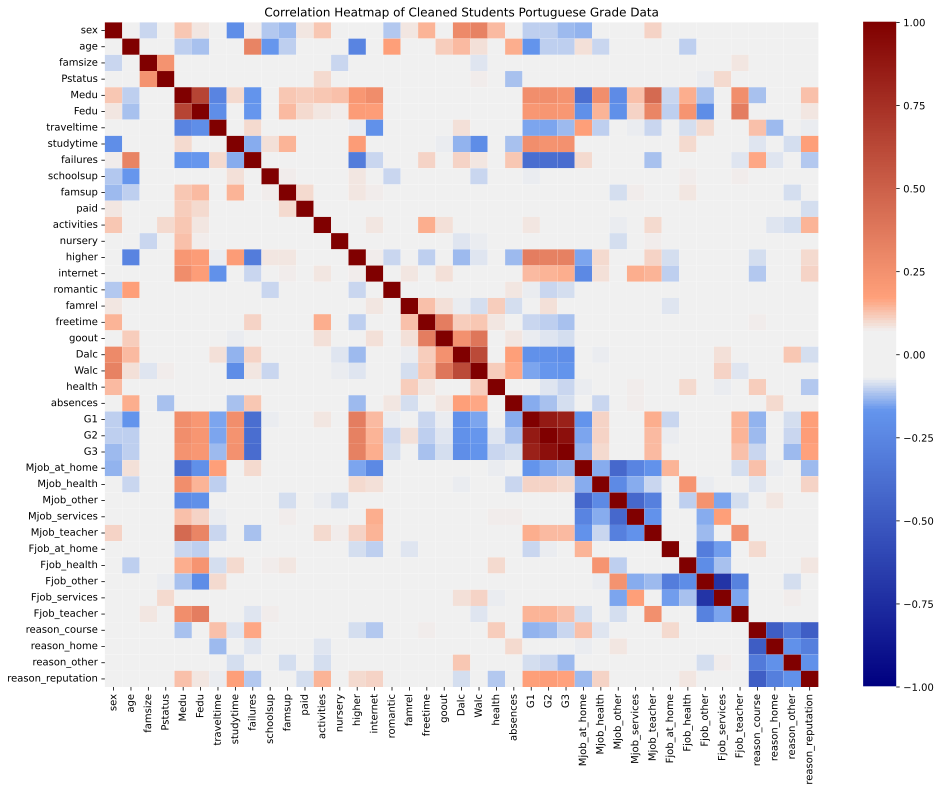

In [82]:
df_corr = df_cln.copy()

# Calculate the correlation matrix
# This matrix will contain float values (correlation coefficients)
correlation_matrix = df_corr.corr()

# 1. Get the base 'seismic' colormap (Updated to address the deprecation warning)
seismic_base = matplotlib.colormaps.get_cmap('seismic')

# Define the data boundaries for muting/highlighting
weak_corr_threshold_neg = -0.07
weak_corr_threshold_pos = 0.07

# Calculate the normalized positions for these thresholds on a [-1, 1] scale
# Normalized position = (data_value - vmin) / (vmax - vmin)
# For vmin=-1, vmax=1:
norm_pos_neg_bound = (weak_corr_threshold_neg - (-1.0)) / (1.0 - (-1.0)) # For -0.25 -> 0.375
norm_pos_pos_bound = (weak_corr_threshold_pos - (-1.0)) / (1.0 - (-1.0)) # For 0.25 -> 0.625

# Define the specific colors for the custom colormap
# These are chosen for high contrast and a truly neutral middle
color_neg_extreme = '#000080'  # Very dark navy blue for strong negative
color_mild_neg = '#6495ED'    # Cornflower blue for moderate negative
color_center_muted = '#F0F0F0' # Very light gray/almost white for weak correlations
color_mild_pos = '#FFA07A'    # Light salmon for moderate positive
color_pos_extreme = '#800000'  # Very dark maroon for strong positive

# Define the color stops for the LinearSegmentedColormap
# We're defining transitions to ensure the middle range is flat and muted,
# and the extremes are distinct.

# (normalized_position, color) tuples
cmap_data_high_contrast = [
    (0.0, color_neg_extreme),             # -1.0: Deepest Negative
    (norm_pos_neg_bound - 0.05, color_mild_neg), # Just before -0.25: Mild Negative
    (norm_pos_neg_bound, color_center_muted), # At -0.25: Start of Muted Center
    (norm_pos_pos_bound, color_center_muted), # At 0.25: End of Muted Center
    (norm_pos_pos_bound + 0.05, color_mild_pos), # Just after 0.25: Mild Positive
    (1.0, color_pos_extreme)              # 1.0: Deepest Positive
]

# Create the custom high-contrast colormap
custom_highlight_cmap = LinearSegmentedColormap.from_list(
    "custom_highlight_contrast", cmap_data_high_contrast
)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12)) # Adjust figure size for better readability of many columns
sns.heatmap(
    correlation_matrix, 
    annot=False, 
    cmap=custom_highlight_cmap, 
    fmt=".2f", 
    vmin=-1, 
    vmax=1, 
    center=0 
    ) # fmt=".2f" for 2 decimal places if annot=True
plt.title('Correlation Heatmap of Cleaned Students Portuguese Grade Data')
plt.show()



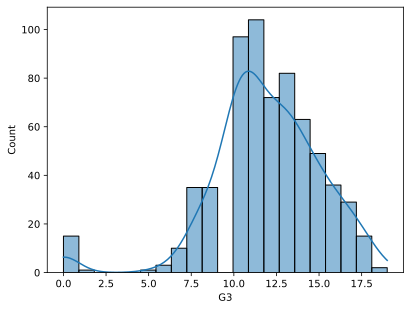

In [83]:
sns.histplot(df_corr['G3'], kde=True)
plt.show()

In [84]:
grade_columns = ['G1', 'G2', 'G3']

# --- Apply the transformation using np.where ---
print("Converting specified grade columns to numerical (0/1) Fail/Pass...")

for col in grade_columns:
    # Create a new column, e.g., 'G1_binary'
    # If grade <= 10, it's 0 (Fail). Otherwise, it's 1 (Pass).
    df_corr[f'{col}_binary'] = np.where(df_corr[col] <= 10, 0, 1)
    print(f"  - Column '{col}' converted to '{col}_binary'")

# --- Verify the changes (display head of relevant columns) ---
print("\nSample of converted data (numerical 0/1):")
print(df_corr[['G1', 'G1_binary', 'G2', 'G2_binary', 'G3', 'G3_binary']].head(11))

Converting specified grade columns to numerical (0/1) Fail/Pass...
  - Column 'G1' converted to 'G1_binary'
  - Column 'G2' converted to 'G2_binary'
  - Column 'G3' converted to 'G3_binary'

Sample of converted data (numerical 0/1):
    G1  G1_binary  G2  G2_binary  G3  G3_binary
0    0          0  11          1  11          1
1    9          0  11          1  11          1
2   12          1  13          1  12          1
3   14          1  14          1  14          1
4   11          1  13          1  13          1
5   12          1  12          1  13          1
6   13          1  12          1  13          1
7   10          0  13          1  13          1
8   15          1  16          1  17          1
9   12          1  12          1  13          1
10  14          1  14          1  14          1


In [85]:
df_corr.head(11)

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,G1_binary,G2_binary,G3_binary
0,0,18,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1
1,0,17,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
2,0,15,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1
3,0,15,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1
4,0,16,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1
5,1,16,0,1,4,3,1,2,0,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,12,12,13,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1
6,1,16,0,1,2,2,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,13,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1
7,0,17,1,0,4,4,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,10,13,13,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1
8,1,15,0,0,3,2,1,2,0,0,1,0,0,1,1,1,0,4,2,2,1,1,1,0,15,16,17,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1
9,1,15,1,1,3,4,1,2,0,0,1,0,1,1,1,1,0,5,5,1,1,1,5,0,12,12,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1


In [86]:
cols_2_drop = ["G1", "G2", "G3"]

dfc_clean = df_corr.drop(columns=cols_2_drop, errors="ignore")

In [87]:
dfc_clean.head(11)

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,G1_binary,G2_binary,G3_binary
0,0,18,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1
1,0,17,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
2,0,15,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1
3,0,15,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1
4,0,16,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1
5,1,16,0,1,4,3,1,2,0,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1
6,1,16,0,1,2,2,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1
7,0,17,1,0,4,4,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1
8,1,15,0,0,3,2,1,2,0,0,1,0,0,1,1,1,0,4,2,2,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1
9,1,15,1,1,3,4,1,2,0,0,1,0,1,1,1,1,0,5,5,1,1,1,5,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1


In [88]:
if 'G3_binary' in dfc_clean.columns:
    dfc_clean['passed'] = dfc_clean['G3_binary'].copy()
    print("Created 'passed' column as a copy of 'G3_binary'.")
else:
    print("Warning: 'G3_binary' column not found. Cannot create 'passed' column.")

# --- Re-classify columns based on their CURRENT state in dfc_clean ---

# Numerical (continuous or ordinal-like, now all numerical)
numerical_features = [
    'age', 'absences', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',    
]

# Binary encoded features (0/1)
# Note: 'G3_binary' is explicitly listed here as it's still intact
binary_features = [
    'sex', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'romantic',
    'G1_binary', 'G2_binary', 'G3_binary' # G3_binary is here, 'passed' is the target
]

# One-hot encoded features (these will be multiple columns per original feature)
one_hot_features_prefixes = [
    'Mjob_', 'Fjob_', 'reason_'
]

# Dynamically find the actual one-hot encoded columns
one_hot_encoded_columns = [col for col in dfc_clean.columns if any(col.startswith(prefix) for prefix in one_hot_features_prefixes)]

# Combine all numerical features for overall description (excluding 'passed' as it's the target)
all_numerical_for_describe = numerical_features + binary_features + one_hot_encoded_columns


Created 'passed' column as a copy of 'G3_binary'.


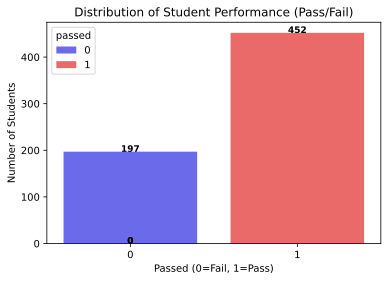

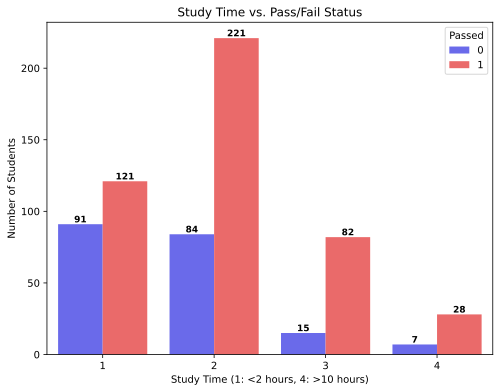

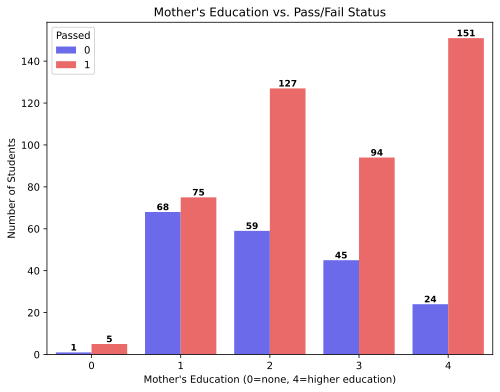

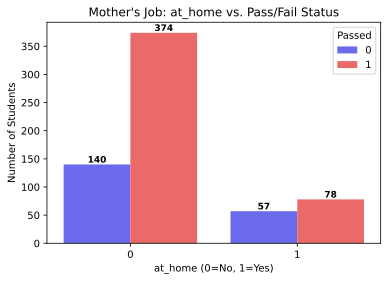

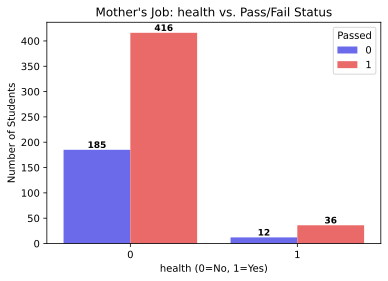

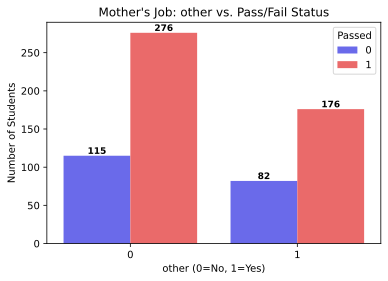

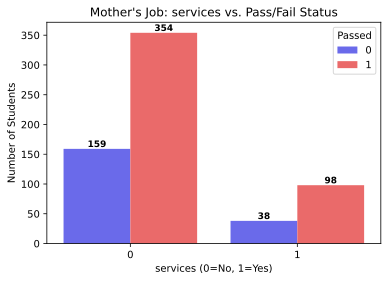

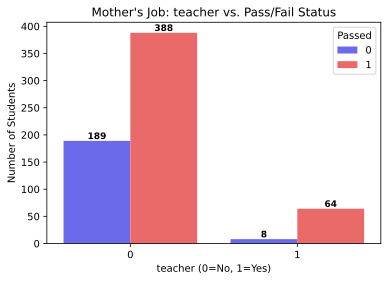

In [145]:
# --- Function to add value labels to bar plots ---
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar plot.

    Args:
        ax (matplotlib.axes.Axes): The matplotlib axes object.
        spacing (int): The distance between the bar and the label.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'center'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            space *= -1
            va = 'top'

        
        ax.text(
            x_value,
            y_value + space,
            f'{int(y_value)}', # Format the number as an integer
            ha='center',
            va=va,
            fontsize=9, 
            fontweight='bold' # Adjust font size as needed
        )


# --- Example: Distribution of 'passed' (Target Variable) ---
if 'passed' in dfc_clean.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='passed', data=dfc_clean, hue='passed', palette='seismic') # Assign the Axes object to 'ax'
    plt.title('Distribution of Student Performance (Pass/Fail)')
    plt.xlabel('Passed (0=Fail, 1=Pass)')
    plt.ylabel('Number of Students')
    add_value_labels(ax) # Call the function to add labels
    plt.show()
else:
    print("Target variable 'passed' not found. Cannot plot its distribution.")


# --- Example: Relationship between Studytime and Passing ---
if 'studytime' in dfc_clean.columns and 'passed' in dfc_clean.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=dfc_clean, x='studytime', hue='passed', palette='seismic') # Assign to 'ax'
    plt.title('Study Time vs. Pass/Fail Status')
    plt.xlabel('Study Time (1: <2 hours, 4: >10 hours)')
    plt.ylabel('Number of Students')
    plt.legend(title='Passed')

    # For plots with 'hue', you need to iterate through the containers for each hue category
    # This is a bit more complex than single bar plots
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, fontweight='bold') # Use bar_label for newer Matplotlib versions
    # If bar_label doesn't work (older matplotlib), you can use a loop similar to add_value_labels but for each container

    plt.show()
else:
    print("Required columns for 'Study Time vs. Passing' plot not found.")


# --- Example: Distribution of Key Ordinal/Binary Features vs. Passing Status (Medu) ---
if 'Medu' in dfc_clean.columns and 'passed' in dfc_clean.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=dfc_clean, x='Medu', hue='passed', palette='seismic') # Assign to 'ax'
    plt.title("Mother's Education vs. Pass/Fail Status")
    plt.xlabel("Mother's Education (0=none, 4=higher education)")
    plt.ylabel('Number of Students')
    plt.legend(title='Passed')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, fontweight='bold')
    plt.show()

# --- Example: One-Hot Encoded Features vs. Passing Status (Mjob) ---
mjob_cols = [col for col in dfc_clean.columns if col.startswith('Mjob_')]
if mjob_cols and 'passed' in dfc_clean.columns:
    for mjob_col in mjob_cols:
        plt.figure(figsize=(6, 4))
        ax = sns.countplot(data=dfc_clean, x=mjob_col, hue='passed', palette='seismic') # Assign to 'ax'
        plt.title(f'{mjob_col.replace("Mjob_", "Mother\'s Job: ")} vs. Pass/Fail Status')
        plt.xlabel(f'{mjob_col.replace("Mjob_", "")} (0=No, 1=Yes)')
        plt.ylabel('Number of Students')
        plt.legend(title='Passed')
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=9, fontweight='bold')
        plt.show()



In [101]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    Int64
 1   age                649 non-null    int64
 2   famsize            649 non-null    Int64
 3   Pstatus            649 non-null    Int64
 4   Medu               649 non-null    int64
 5   Fedu               649 non-null    int64
 6   traveltime         649 non-null    int64
 7   studytime          649 non-null    int64
 8   failures           649 non-null    int64
 9   schoolsup          649 non-null    Int64
 10  famsup             649 non-null    Int64
 11  paid               649 non-null    Int64
 12  activities         649 non-null    Int64
 13  nursery            649 non-null    Int64
 14  higher             649 non-null    Int64
 15  internet           649 non-null    Int64
 16  romantic           649 non-null    Int64
 17  famrel          

In [102]:
dfc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    Int64
 1   age                649 non-null    int64
 2   famsize            649 non-null    Int64
 3   Pstatus            649 non-null    Int64
 4   Medu               649 non-null    int64
 5   Fedu               649 non-null    int64
 6   traveltime         649 non-null    int64
 7   studytime          649 non-null    int64
 8   failures           649 non-null    int64
 9   schoolsup          649 non-null    Int64
 10  famsup             649 non-null    Int64
 11  paid               649 non-null    Int64
 12  activities         649 non-null    Int64
 13  nursery            649 non-null    Int64
 14  higher             649 non-null    Int64
 15  internet           649 non-null    Int64
 16  romantic           649 non-null    Int64
 17  famrel          

In [103]:
df = df_cln.drop(columns=['G1','G2'])

In [108]:
X = df.drop(columns=['G3'])
y = df['G3'] # Ensure y is G3

print(f"Features (X) shape after selection: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Perform the train-test split (no stratify for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Features (X) shape after selection: (649, 38)
Target (y) shape: (649,)

X_train shape: (519, 38)
X_test shape: (130, 38)
y_train shape: (519,)
y_test shape: (130,)


In [109]:
print("\n--- Step 5 & 6: Select and Train the Model (Linear Regression) ---")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)



--- Step 5 & 6: Select and Train the Model (Linear Regression) ---


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
print("\n--- Step 6.1: Perform Cross-Validation ---")

# Define the cross-validation strategy (e.g., 5-fold cross-validation)
# KFold is suitable for regression
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
# 'neg_mean_squared_error' is used because cross_val_score maximizes the score,
# and we want to minimize MSE, so we use its negative. We'll convert it back later.
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE and calculate RMSE
cv_mse_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print(f"Cross-Validation MSE scores: {cv_mse_scores}")
print(f"Mean CV MSE: {np.mean(cv_mse_scores):.4f} (+/- {np.std(cv_mse_scores):.4f})")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f} (+/- {np.std(cv_rmse_scores):.4f})")


print("\n--- Step 6.2: Hyper-parameter Tuning (Example for Linear Regression) ---")
# Define the parameter grid for GridSearchCV
# fit_intercept: whether to calculate the intercept for this model.
# positive: when set to True, forces the coefficients to be positive.
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Initialize GridSearchCV
# REMOVED 'random_state=42' from LinearRegression() initialization
grid_search = GridSearchCV(estimator=LinearRegression(), # Corrected line
                           param_grid=param_grid,
                           cv=cv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_ # Convert back to positive MSE

print(f"\nBest hyperparameters found: {best_params}")
print(f"Best cross-validation MSE with best parameters: {best_cv_score:.4f}")

# Update the 'model' variable to the best found model for subsequent steps
model = best_model
print("\nModel updated to the best performing model from tuning.")


--- Step 6.1: Perform Cross-Validation ---
Cross-Validation MSE scores: [ 8.04187508  7.44717233 11.13177957  7.21295657  5.65347794]
Mean CV MSE: 7.8975 (+/- 1.7994)
Mean CV RMSE: 2.7929 (+/- 0.3115)

--- Step 6.2: Hyper-parameter Tuning (Example for Linear Regression) ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameters found: {'fit_intercept': False, 'positive': False}
Best cross-validation MSE with best parameters: 8.3417

Model updated to the best performing model from tuning.



--- Step 7: Make Predictions on the Test Set ---

Predictions made on the test set.

--- Step 8: Visualize the Results ---


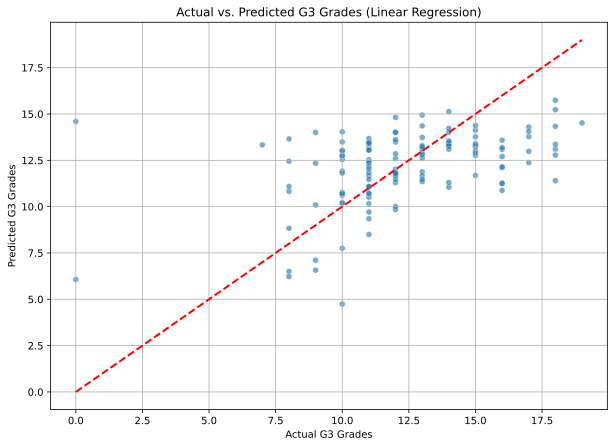

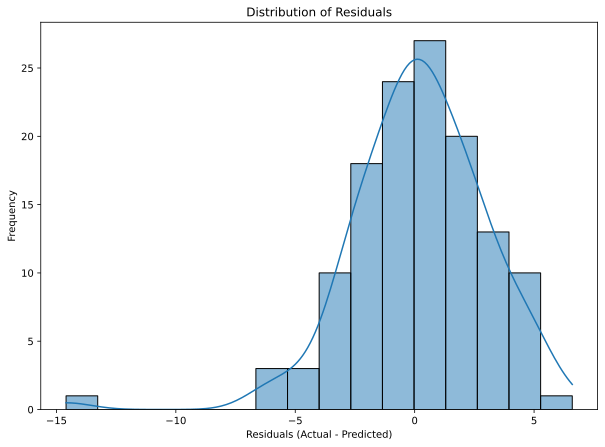

In [113]:
print("\n--- Step 7: Make Predictions on the Test Set ---")

# Use the (potentially tuned) model to make predictions on the unseen test data
y_pred = model.predict(X_test)

print("\nPredictions made on the test set.")


print("\n--- Step 8: Visualize the Results ---")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal prediction line
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Actual vs. Predicted G3 Grades (Linear Regression)")
plt.grid(True)
plt.show()

# Residuals plot (difference between actual and predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [116]:
print("\n--- Step 9: Collect Accuracies and Performance Measures ---")

# Calculate performance metrics on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Test Set R-squared (R2): {test_r2:.4f}")


print("\n--- Step 10: Test Your Best Model on the Test Set and Close-out ---")
# This step summarizes the final evaluation of the best model on the unseen test set.

print(f"\nFinal Model Used: {type(model).__name__}")
print(f"Model Parameters: {model.get_params()}")
print(f"Test Set Performance:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R-squared: {test_r2:.4f}")

print("\nRegression modeling workflow complete for Linear Regression.")


--- Step 9: Collect Accuracies and Performance Measures ---
Test Set Mean Squared Error (MSE): 8.0419
Test Set Root Mean Squared Error (RMSE): 2.8358
Test Set R-squared (R2): 0.1753

--- Step 10: Test Your Best Model on the Test Set and Close-out ---

Final Model Used: LinearRegression
Model Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
Test Set Performance:
  MSE: 8.0419
  RMSE: 2.8358
  R-squared: 0.1753

Regression modeling workflow complete for Linear Regression.


In [117]:
# Create the initial pool of features to consider for selection
# This ensures we start with features *other* than the grades
columns_to_exclude_from_X_for_FS = ['G3', 'G1_binary', 'G2_binary', 'G3_binary', 'passed']
initial_features_pool = [col for col in df.columns if col not in columns_to_exclude_from_X_for_FS]

X_full = df[initial_features_pool] # All potential features for selection
y = df['G3'] # Our continuous target (G3)

print(f"Initial feature pool size: {len(initial_features_pool)}")
print(f"Target (y) shape: {y.shape}")

selected_features = []
# For regression, to MINIMIZE MSE, so initialize with a very large number
best_mse_so_far = float('inf')
remaining_features = list(initial_features_pool) # Features not yet selected

print("\nStarting Sequential Forward Feature Selection:")
print("---------------------------------------------")

# Loop to add one feature at a time
while remaining_features:
    best_feature_this_round = None
    best_mse_this_round = float('inf')

    # Try adding each remaining feature to the current set of selected features
    for candidate_feature in remaining_features:
        current_features_for_test = selected_features + [candidate_feature]

        # Prepare X for the current set of features
        X_current = X_full[current_features_for_test]

        # Split data into training and testing sets
        # No stratify for regression targets
        X_train, X_test, y_train, y_test = train_test_split(X_current, y, test_size=0.2, random_state=42)

        # Create a Linear Regression model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred) # No rounding here for selection logic

        # Check if this feature combination is better (lower MSE)
        if mse < best_mse_this_round:
            best_mse_this_round = mse
            best_feature_this_round = candidate_feature

    # If a feature improved MSE, add it to selected_features
    # We check if the improvement is significant (e.g., more than a tiny epsilon)
    # to avoid adding features that give negligible improvement
    if best_feature_this_round is not None and best_mse_this_round < (best_mse_so_far - 1e-4): # 1e-4 is a small threshold
        selected_features.append(best_feature_this_round)
        remaining_features.remove(best_feature_this_round)
        best_mse_so_far = best_mse_this_round
        print(f"Added feature: '{best_feature_this_round}' | Current Features: {selected_features} | MSE: {best_mse_so_far:.4f}")
    else:
        # No significant further improvement, stop adding features
        print("\nNo significant improvement found by adding more features. Stopping feature selection.")
        break

print("\n--- Feature Selection Complete ---")
print(f"Optimal features selected: {selected_features}")
print(f"Best MSE achieved with these features: {best_mse_so_far:.4f}")

# Now, define X for the subsequent steps using only the selected features
X_final_selected_features = df[selected_features]

print(f"\nFinal X (features) shape after selection: {X_final_selected_features.shape}")
print(f"Final X (features) columns: {X_final_selected_features.columns.tolist()}")


Initial feature pool size: 38
Target (y) shape: (649,)

Starting Sequential Forward Feature Selection:
---------------------------------------------
Added feature: 'higher' | Current Features: ['higher'] | MSE: 8.6649
Added feature: 'failures' | Current Features: ['higher', 'failures'] | MSE: 8.1557
Added feature: 'studytime' | Current Features: ['higher', 'failures', 'studytime'] | MSE: 7.8986
Added feature: 'Fjob_teacher' | Current Features: ['higher', 'failures', 'studytime', 'Fjob_teacher'] | MSE: 7.6767
Added feature: 'internet' | Current Features: ['higher', 'failures', 'studytime', 'Fjob_teacher', 'internet'] | MSE: 7.5362
Added feature: 'sex' | Current Features: ['higher', 'failures', 'studytime', 'Fjob_teacher', 'internet', 'sex'] | MSE: 7.3742
Added feature: 'romantic' | Current Features: ['higher', 'failures', 'studytime', 'Fjob_teacher', 'internet', 'sex', 'romantic'] | MSE: 7.2615
Added feature: 'freetime' | Current Features: ['higher', 'failures', 'studytime', 'Fjob_teach

In [123]:
print("--- Step 4: Train-Test Split (with selected features) ---")

X = X_final_selected_features
# y already defined from the feature selection block

print(f"Features (X) shape after selection: {X_final_selected_features.shape}")
print(f"Target (y) shape: {y.shape}")

# Perform the train-test split (no stratify for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X_final_selected_features, y, test_size=0.20, random_state=42
)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n--- Step 4.1: Feature Scaling (StandardScaler) ---") # NEW STEP

scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train)

# Transform both training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


--- Step 4: Train-Test Split (with selected features) ---
Features (X) shape after selection: (649, 16)
Target (y) shape: (649,)

X_train shape: (519, 16)
X_test shape: (130, 16)
y_train shape: (519,)
y_test shape: (130,)

--- Step 4.1: Feature Scaling (StandardScaler) ---
Features scaled successfully.
X_train_scaled shape: (519, 16)
X_test_scaled shape: (130, 16)


In [128]:
print("\n--- Step 5 & 6: Select and Train the Model (Linear Regression) ---")

# Now train the model on the SCALED training data
model = LinearRegression()
model.fit(X_train_scaled, y_train) # Use X_train_scaled

print("\nLinear Regression model trained successfully on scaled data.")


print("\n--- Step 6.1: Perform Cross-Validation ---")

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the FULL SCALED DATASET (X_final_selected_features_scaled)
# To do this correctly, you need to scale the *entire* X_final_selected_features first
# or integrate scaling into a pipeline for cross_val_score.
# For simplicity, let's just use the X_train_scaled/X_test_scaled for now for CV,
# but ideally, for robust CV, you'd use a pipeline.

# Let's create a scaled version of the full dataset for cross_val_score
# This scaler is fitted on X_final_selected_features for CV purposes only,
# not for the main train/test split.
full_data_scaler = StandardScaler()
X_full_scaled_for_cv = full_data_scaler.fit_transform(X_final_selected_features)


cv_scores = cross_val_score(model, X_full_scaled_for_cv, y, cv=cv, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print(f"Cross-Validation MSE scores: {cv_mse_scores}")
print(f"Mean CV MSE: {np.mean(cv_mse_scores):.4f} (+/- {np.std(cv_mse_scores):.4f})")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f} (+/- {np.std(cv_rmse_scores):.4f})")


print("\n--- Step 6.2: Hyper-parameter Tuning (Example for Linear Regression) ---")

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(),
                           param_grid=param_grid,
                           cv=cv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Perform the grid search on the SCALED training data
grid_search.fit(X_train_scaled, y_train) # Use X_train_scaled

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_

print(f"\nBest hyperparameters found: {best_params}")
print(f"Best cross-validation MSE with best parameters: {best_cv_score:.4f}")

model = best_model
print("\nModel updated to the best performing model from tuning.")


--- Step 5 & 6: Select and Train the Model (Linear Regression) ---

Linear Regression model trained successfully on scaled data.

--- Step 6.1: Perform Cross-Validation ---
Cross-Validation MSE scores: [ 6.84457726  7.45734654 11.51879679  7.58759681  5.78397026]
Mean CV MSE: 7.8385 (+/- 1.9474)
Mean CV RMSE: 2.7801 (+/- 0.3309)

--- Step 6.2: Hyper-parameter Tuning (Example for Linear Regression) ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameters found: {'fit_intercept': True, 'positive': False}
Best cross-validation MSE with best parameters: 8.2175

Model updated to the best performing model from tuning.



--- Step 7: Make Predictions on the Test Set ---

Predictions made on the test set.

--- Step 8: Visualize the Results ---


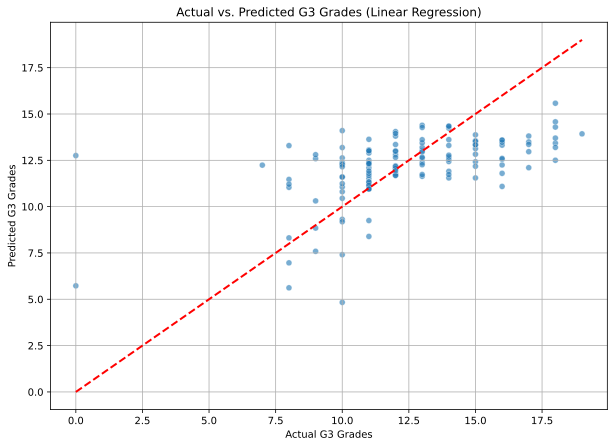

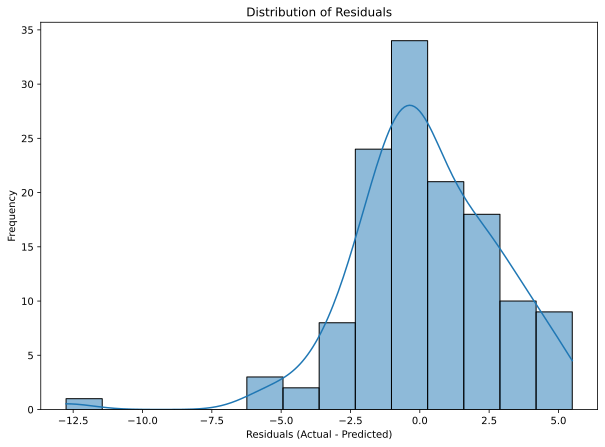


--- Step 9: Collect Accuracies and Performance Measures ---
Test Set Mean Squared Error (MSE): 6.8446
Test Set Root Mean Squared Error (RMSE): 2.6162
Test Set R-squared (R2): 0.2981

--- Step 10: Test Your Best Model on the Test Set and Close-out ---

Final Model Used: LinearRegression
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
Test Set Performance:
  MSE: 6.8446
  RMSE: 2.6162
  R-squared: 0.2981

Regression modeling workflow complete for Linear Regression with scaling.


In [129]:
print("\n--- Step 7: Make Predictions on the Test Set ---")

# Make predictions on the SCALED test data
y_pred = model.predict(X_test_scaled) # Use X_test_scaled

print("\nPredictions made on the test set.")


print("\n--- Step 8: Visualize the Results ---")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Actual vs. Predicted G3 Grades (Linear Regression)")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


print("\n--- Step 9: Collect Accuracies and Performance Measures ---")

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Test Set R-squared (R2): {test_r2:.4f}")


print("\n--- Step 10: Test Your Best Model on the Test Set and Close-out ---")

print(f"\nFinal Model Used: {type(model).__name__}")
print(f"Model Parameters: {model.get_params()}")
print(f"Test Set Performance:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R-squared: {test_r2:.4f}")

print("\nRegression modeling workflow complete for Linear Regression with scaling.")

--- Step 4: Train-Test Split (with selected features) ---
Features (X) shape after selection: (649, 16)
Target (y) shape: (649,)

X_train shape: (519, 16)
X_test shape: (130, 16)
y_train shape: (519,)
y_test shape: (130,)

--- Step 4.5: Feature Scaling (StandardScaler) ---
Features scaled successfully (Note: Not strictly necessary for Random Forest).
X_train_scaled shape: (519, 16)
X_test_scaled shape: (130, 16)

--- Step 5 & 6: Select and Train the Model (Random Forest Regressor) ---

Random Forest Regressor model trained successfully.

--- Step 6.1: Perform Cross-Validation ---
Cross-Validation MSE scores: [ 7.55294021  9.06045456 11.84140583  8.63213457  6.03395916]
Mean CV MSE: 8.6242 (+/- 1.9182)
Mean CV RMSE: 2.9188 (+/- 0.3239)

--- Step 6.2: Hyper-parameter Tuning (Random Forest Regressor) ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best hyperparameters found for Random Forest: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 200}
Best cross-vali

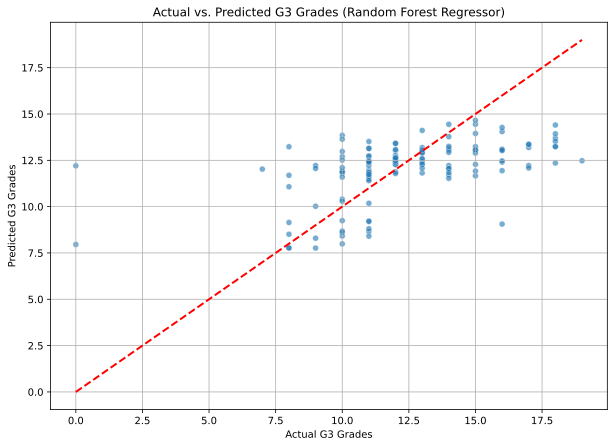

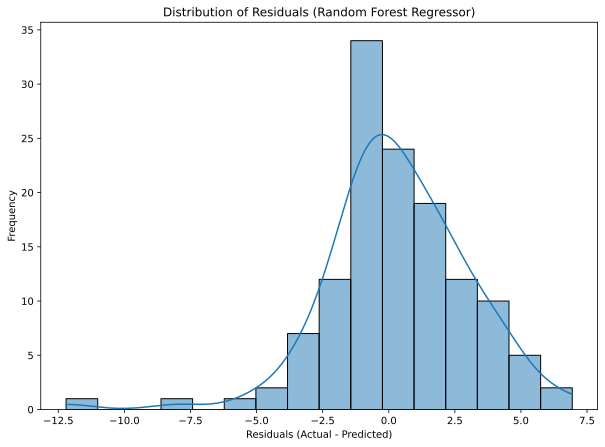


--- Step 9: Collect Accuracies and Performance Measures ---
Test Set Mean Squared Error (MSE): 7.2333
Test Set Root Mean Squared Error (RMSE): 2.6895
Test Set R-squared (R2): 0.2583

--- Step 10: Test Your Best Model on the Test Set and Close-out ---

Final Model Used: RandomForestRegressor
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Test Set Performance:
  MSE: 7.2333
  RMSE: 2.6895
  R-squared: 0.2583

Regression modeling workflow complete for Random Forest Regressor.


In [131]:
print("--- Step 4: Train-Test Split (with selected features) ---")

# X_final_selected_features and y are already defined
print(f"Features (X) shape after selection: {X_final_selected_features.shape}")
print(f"Target (y) shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X_final_selected_features, y, test_size=0.20, random_state=42
)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


print("\n--- Step 4.5: Feature Scaling (StandardScaler) ---")
# For RandomForestRegressor, scaling is NOT necessary, but we keep the code
# for demonstration and if you switch to scale-sensitive models later.
# You can comment out or remove this block if you are only using RF.

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully (Note: Not strictly necessary for Random Forest).")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


print("\n--- Step 5 & 6: Select and Train the Model (Random Forest Regressor) ---")

# Initialize the RandomForestRegressor model
# Use X_train (unscaled) for Random Forest, as it's not sensitive to scaling
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train) # Use X_train (unscaled) here

print("\nRandom Forest Regressor model trained successfully.")


print("\n--- Step 6.1: Perform Cross-Validation ---")

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use X_final_selected_features (unscaled) for cross-validation with Random Forest
cv_scores = cross_val_score(model, X_final_selected_features, y, cv=cv, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print(f"Cross-Validation MSE scores: {cv_mse_scores}")
print(f"Mean CV MSE: {np.mean(cv_mse_scores):.4f} (+/- {np.std(cv_mse_scores):.4f})")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f} (+/- {np.std(cv_rmse_scores):.4f})")


print("\n--- Step 6.2: Hyper-parameter Tuning (Random Forest Regressor) ---")
# RandomForestRegressor has more important hyperparameters to tune.
# This will take longer. You can start with a smaller grid.

param_grid_rf = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_leaf': [1, 5, 10] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=cv,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              verbose=2) # verbose=2 shows more details during fitting

# Perform the grid search on the UNSEALED training data
grid_search_rf.fit(X_train, y_train) # Use X_train (unscaled)

best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_cv_score_rf = -grid_search_rf.best_score_

print(f"\nBest hyperparameters found for Random Forest: {best_params_rf}")
print(f"Best cross-validation MSE with best Random Forest parameters: {best_cv_score_rf:.4f}")

# Update the 'model' variable to the best found Random Forest model
model = best_model_rf
print("\nModel updated to the best performing Random Forest Regressor from tuning.")


print("\n--- Step 7: Make Predictions on the Test Set ---")

# Make predictions on the UNSEALED test data
y_pred = model.predict(X_test) # Use X_test (unscaled)

print("\nPredictions made on the test set.")


print("\n--- Step 8: Visualize the Results ---")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Actual vs. Predicted G3 Grades (Random Forest Regressor)")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Random Forest Regressor)")
plt.show()


print("\n--- Step 9: Collect Accuracies and Performance Measures ---")

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Test Set R-squared (R2): {test_r2:.4f}")


print("\n--- Step 10: Test Your Best Model on the Test Set and Close-out ---")

print(f"\nFinal Model Used: {type(model).__name__}")
print(f"Model Parameters: {model.get_params()}")
print(f"Test Set Performance:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R-squared: {test_r2:.4f}")

print("\nRegression modeling workflow complete for Random Forest Regressor.")

--- Preparing Data for Sliced Charts ---
'passed' column already exists and is consistent with G3 >= 10.
Created 'age_category' column.

--- Generating Sliced Charts ---


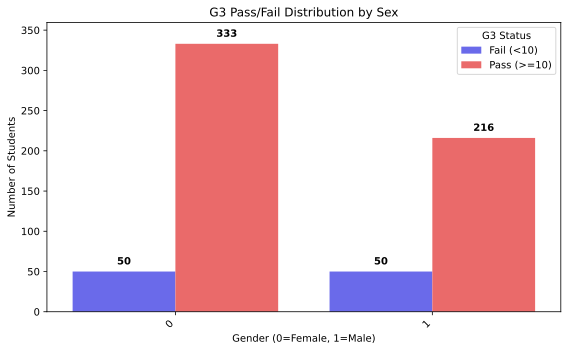

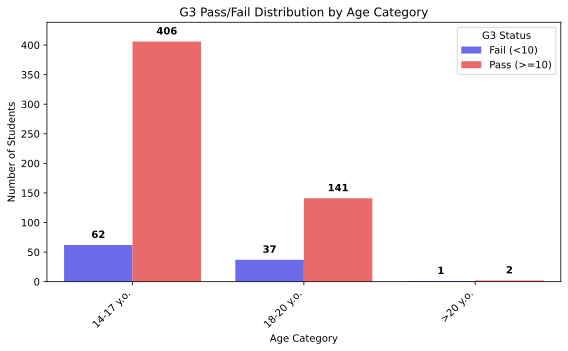

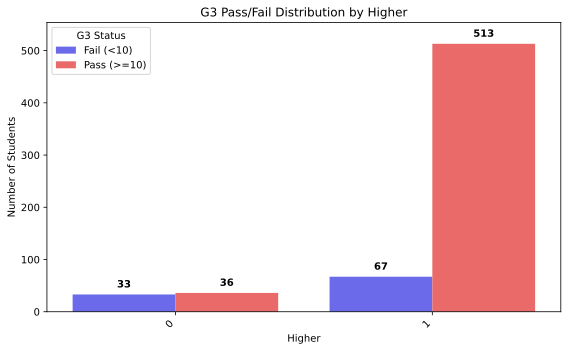

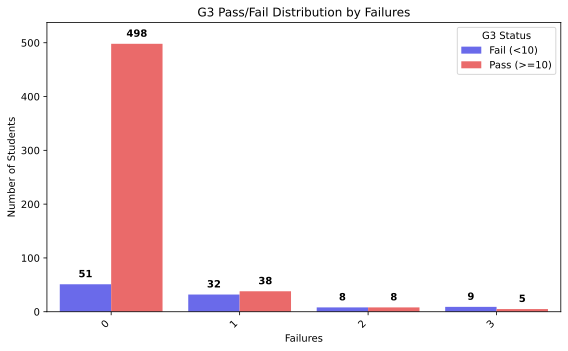

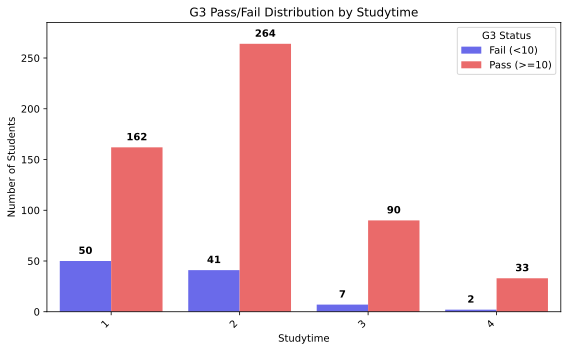


Charts generated successfully.


In [140]:
print("--- Preparing Data for Sliced Charts ---")

# 1. Ensure 'passed' column is correctly derived from 'G3'
# (G3 >= 10 for pass, < 10 for fail)
if 'passed' not in df_cln.columns or not (df_cln['passed'] == (df_cln['G3'] >= 10).astype(int)).all():
    df_cln['passed'] = (df_cln['G3'] >= 10).astype(int)
    print("Created/Updated 'passed' column based on G3 >= 10.")
else:
    print("'passed' column already exists and is consistent with G3 >= 10.")

# 2. Create 'age_category' column
# Define age bins and labels
age_bins = [14, 18, 21, df_cln['age'].max() + 1] # +1 to ensure max age is included
age_labels = ['14-17 y.o.', '18-20 y.o.', '>20 y.o.']

df_cln['age_category'] = pd.cut(dfc_clean['age'], bins=age_bins, labels=age_labels, right=False)
print("Created 'age_category' column.")

# 3. Define the top 3 selected features
# Based on your feature selection output:
top_3_features = ['higher', 'failures', 'studytime']

# Define a helper function to add value labels to countplots
def add_value_labels(ax, orient='v', spacing=5):
    """Add labels to the end of each bar in a bar plot."""
    if orient == 'v':
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold', padding=spacing)
    elif orient == 'h':
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold', padding=spacing)

print("\n--- Generating Sliced Charts ---")
# spa_palette = ['#D2B48C', '#A0522D']

# List of attributes to plot against 'passed', now including 'sex'
attributes_to_plot = ['sex', 'age_category'] + top_3_features

# Create plots for each attribute
for attribute in attributes_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df_cln, x=attribute, hue='passed', palette='seismic')
    
    # Customizing x-axis labels for binary 'sex'
    if attribute == 'sex':
        plt.xlabel('Gender (0=Female, 1=Male)')
    else:
        plt.xlabel(attribute.replace("_", " ").title())

    plt.title(f'G3 Pass/Fail Distribution by {attribute.replace("_", " ").title()}')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='G3 Status', labels=['Fail (<10)', 'Pass (>=10)'])
    max_height = 0
    for container in ax.containers:
        for rect in container.patches:
            if rect.get_height() > max_height:
                max_height = rect.get_height()

    
    ax.set_ylim(0, max_height * 1.08) # Adjust 1.08 (8% padding) as needed
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()


print("\nCharts generated successfully.")